In [1]:
# Data Analysis and Wrangling 
import numpy as np
import pandas as pd
import random as rnd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
# Aquire Data

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df,test_df]

In [3]:
train_df.head()
# test_df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
print (train_df.columns.values)

['UniqueID' 'disbursed_amount' 'asset_cost' 'ltv' 'branch_id'
 'supplier_id' 'manufacturer_id' 'Current_pincode_ID' 'Date.of.Birth'
 'Employment.Type' 'DisbursalDate' 'State_ID' 'Employee_code_ID'
 'MobileNo_Avl_Flag' 'Aadhar_flag' 'PAN_flag' 'VoterID_flag'
 'Driving_flag' 'Passport_flag' 'PERFORM_CNS.SCORE'
 'PERFORM_CNS.SCORE.DESCRIPTION' 'PRI.NO.OF.ACCTS' 'PRI.ACTIVE.ACCTS'
 'PRI.OVERDUE.ACCTS' 'PRI.CURRENT.BALANCE' 'PRI.SANCTIONED.AMOUNT'
 'PRI.DISBURSED.AMOUNT' 'SEC.NO.OF.ACCTS' 'SEC.ACTIVE.ACCTS'
 'SEC.OVERDUE.ACCTS' 'SEC.CURRENT.BALANCE' 'SEC.SANCTIONED.AMOUNT'
 'SEC.DISBURSED.AMOUNT' 'PRIMARY.INSTAL.AMT' 'SEC.INSTAL.AMT'
 'NEW.ACCTS.IN.LAST.SIX.MONTHS' 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'
 'AVERAGE.ACCT.AGE' 'CREDIT.HISTORY.LENGTH' 'NO.OF_INQUIRIES'
 'loan_default']


In [5]:
train_df.info()
print (40*'--')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

In [6]:
train_df.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [7]:
train_df.describe(include=['O'])

,Date.of.Birth,Employment.Type,DisbursalDate,PERFORM_CNS.SCORE.DESCRIPTION,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
count,233154,225493,233154,233154,233154,233154
unique,15433,2,84,20,192,294
top,01-01-88,Self employed,31-10-18,No Bureau History Available,0yrs 0mon,0yrs 0mon
freq,2173,127635,8826,116950,119373,119127


In [8]:
# Analysing by Pivoting features

train_df[['Employment.Type','loan_default']].groupby(['Employment.Type'], as_index=False).mean().sort_values(by='loan_default',ascending=False)

,Employment.Type,loan_default
1,Self employed,0.227657
0,Salaried,0.203458


In [9]:
train_df[['PERFORM_CNS.SCORE.DESCRIPTION','loan_default']].groupby(['PERFORM_CNS.SCORE.DESCRIPTION'],as_index=False).mean().sort_values(by='loan_default',ascending=False)

,PERFORM_CNS.SCORE.DESCRIPTION,loan_default
12,M-Very High Risk,0.304581
11,L-Very High Risk,0.280423
10,K-High Risk,0.278120
8,I-Medium Risk,0.272629
19,Not Scored: Sufficient History Not Available,0.255777
9,J-High Risk,0.252401
7,H-Medium Risk,0.241867
13,No Bureau History Available,0.231313
18,Not Scored: Only a Guarantor,0.213115
17,Not Scored: Not Enough Info available on the c...,0.209695


In [10]:
train_df[['branch_id','loan_default']].groupby(['branch_id'],as_index=False).mean().sort_values(by='loan_default',ascending=False)

,branch_id,loan_default
74,251,0.343913
75,254,0.324308
44,97,0.313625
20,36,0.296762
39,78,0.291476
62,153,0.286127
51,117,0.283154
59,146,0.282552
49,105,0.282468
28,65,0.281847


In [11]:
train_df[['manufacturer_id','loan_default']].groupby(['manufacturer_id'],as_index=False).mean().sort_values(by='loan_default',ascending=False)

,manufacturer_id,loan_default
9,153,0.333333
1,48,0.272531
0,45,0.228499
6,120,0.220750
2,49,0.218787
4,67,0.217464
3,51,0.207947
5,86,0.204594
7,145,0.200514
8,152,0.000000


In [12]:
train_df[['State_ID','loan_default']].groupby(['State_ID'],as_index=False).mean().sort_values(by='loan_default',ascending=False)

,State_ID,loan_default
12,13,0.306587
13,14,0.275866
1,2,0.271394
11,12,0.265558
16,17,0.245803
7,8,0.229485
17,18,0.220067
8,9,0.217950
14,15,0.211527
3,4,0.207845


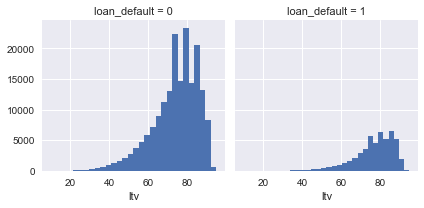

In [13]:
g = sns.FacetGrid(train_df, col='loan_default')
g.map(plt.hist, 'ltv', bins=30)

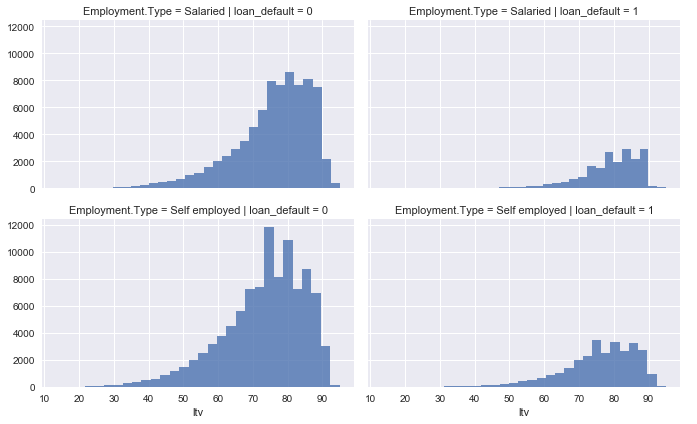

In [14]:
# grid = sns.FacetGrid(train_df, col='Employment.Type', hue='loan_default')
grid = sns.FacetGrid(train_df, col='loan_default', row='Employment.Type', size=3, aspect=1.6)
grid.map(plt.hist, 'ltv', alpha=.8, bins=30)
grid.add_legend();

In [15]:
train_df['PRI_NO_OF_ACCOUNTSBand'] = pd.cut(train_df['PRI.NO.OF.ACCTS'], 20)
train_df[['PRI_NO_OF_ACCOUNTSBand', 'loan_default']].groupby(['PRI_NO_OF_ACCOUNTSBand'], as_index=False).mean().sort_values(by='PRI_NO_OF_ACCOUNTSBand', ascending=True)

,PRI_NO_OF_ACCOUNTSBand,loan_default
0,"(-0.453, 22.65]",0.217621
1,"(22.65, 45.3]",0.161525
2,"(45.3, 67.95]",0.200000
3,"(67.95, 90.6]",0.169811
4,"(90.6, 113.25]",0.400000
5,"(113.25, 135.9]",0.000000
6,"(135.9, 158.55]",0.250000
7,"(158.55, 181.2]",NaN
8,"(181.2, 203.85]",0.000000
9,"(203.85, 226.5]",NaN


In [16]:
train_df['PRI.ACTIVE.ACCTSBand'] = pd.cut(train_df['PRI.ACTIVE.ACCTS'], 5)
train_df[['PRI.ACTIVE.ACCTSBand', 'loan_default']].groupby(['PRI.ACTIVE.ACCTSBand'], as_index=False).mean().sort_values(by='PRI.ACTIVE.ACCTSBand', ascending=True)

,PRI.ACTIVE.ACCTSBand,loan_default
0,"(-0.144, 28.8]",0.217077
1,"(28.8, 57.6]",0.142857
2,"(57.6, 86.4]",0.000000
3,"(86.4, 115.2]",NaN
4,"(115.2, 144.0]",0.000000


In [17]:
train_df['PRI.OVERDUE.ACCTSBand'] = pd.cut(train_df['PRI.OVERDUE.ACCTS'], 5)
train_df[['PRI.OVERDUE.ACCTSBand', 'loan_default']].groupby(['PRI.OVERDUE.ACCTSBand'], as_index=False).mean().sort_values(by='PRI.OVERDUE.ACCTSBand', ascending=True)

,PRI.OVERDUE.ACCTSBand,loan_default
0,"(-0.025, 5.0]",0.217067
1,"(5.0, 10.0]",0.213542
2,"(10.0, 15.0]",0.258065
3,"(15.0, 20.0]",0.333333
4,"(20.0, 25.0]",0.000000
